DATASCI217: Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usa = pd.read_csv('ddf--datapoints--population--by--country-usa--age--gender--year.csv')
canada = pd.read_csv('ddf--datapoints--population--by--country-can--age--gender--year.csv')
india = pd.read_csv('ddf--datapoints--population--by--country-ind--age--gender--year.csv')
china = pd.read_csv('ddf--datapoints--population--by--country-chn--age--gender--year.csv')
ukraine = pd.read_csv('ddf--datapoints--population--by--country-ukr--age--gender--year.csv')

df = pd.concat([usa, canada, india, china, ukraine])

Part 1: Matplotlib

1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

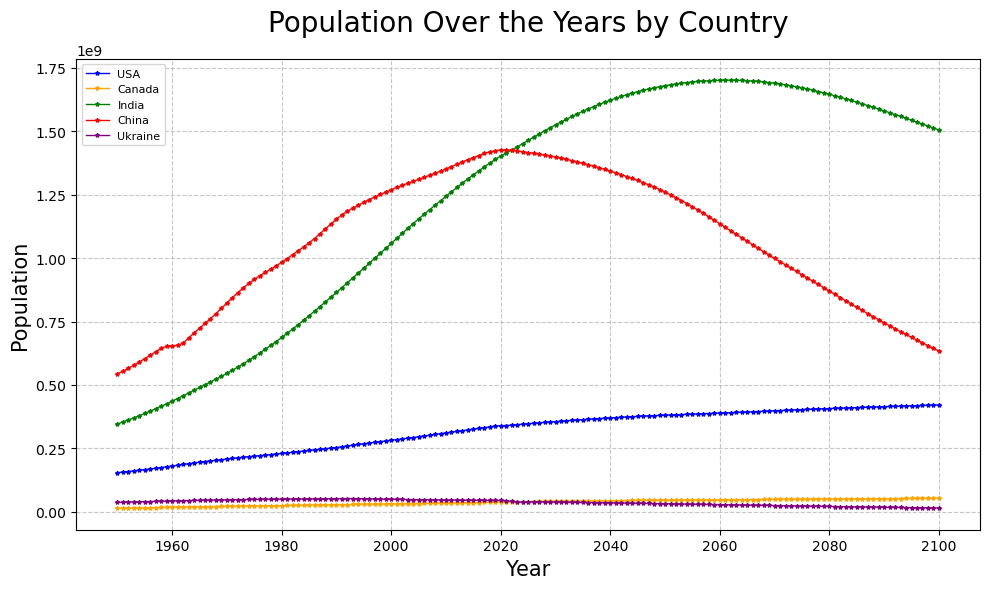

In [7]:
# total population by country for each year
year_usa = usa.groupby('year')['population'].sum().reset_index()
year_canada = canada.groupby('year')['population'].sum().reset_index()
year_india = india.groupby('year')['population'].sum().reset_index()
year_china = china.groupby('year')['population'].sum().reset_index()
year_ukraine = ukraine.groupby('year')['population'].sum().reset_index()

# create figure and axis
plt.figure(figsize = (10, 6))

# create line plot

# plot usa
plt.plot(year_usa['year'], year_usa['population'], 
         marker='*', linestyle='-', color='blue', 
         linewidth=1, markersize=3, label='USA')
# plot canada
plt.plot(year_canada['year'], year_canada['population'], 
         marker='*', linestyle='-', color='orange', 
         linewidth=1, markersize=3, label='Canada')
# plot india
plt.plot(year_india['year'], year_india['population'], 
         marker='*', linestyle='-', color='green', 
         linewidth=1, markersize=3, label='India')
# plot china
plt.plot(year_china['year'], year_china['population'], 
         marker='*', linestyle='-', color='red', 
         linewidth=1, markersize=3, label='China')
# plot ukraine
plt.plot(year_ukraine['year'], year_ukraine['population'], 
         marker='*', linestyle='-', color='purple', 
         linewidth=1, markersize=3, label='Ukraine')

# customize the plot
plt.title('Population Over the Years by Country', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

# add legend
plt.legend(fontsize=8)

# show plot
plt.tight_layout()
plt.show()

2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

/var/folders/zx/z2tjr_791nb_d_97gp385rs40000gn/T/ipykernel_18024/1928354831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = bin_labels, right=False)


<Figure size 1000x600 with 0 Axes>

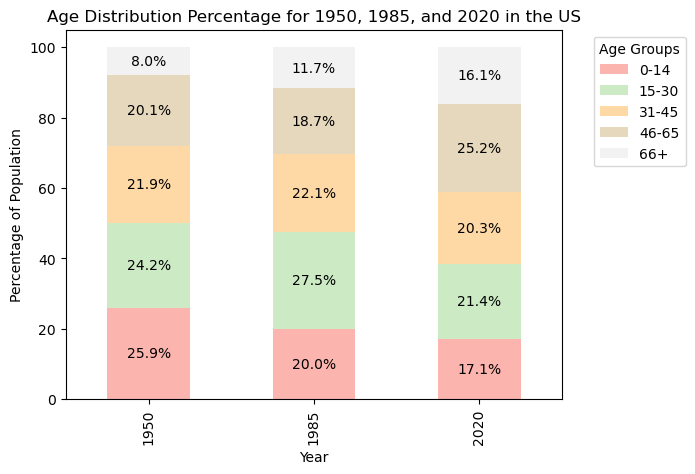

In [10]:
# age distributions between 1950, 1985, 2020
bins = [0, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
years = [1950, 1985, 2020]

usa = pd.read_csv('ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_filter = usa[usa['year'].isin(years)]

# add a new column called age group
df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = bin_labels, right=False)

age_dist = df_filter.groupby(['year', 'age_group'])['population'].sum().unstack()

# population in each age group
age_total = age_dist.sum(axis = 1)
percent = age_dist.apply(lambda row: row / age_total[row.name] * 100, axis=1)

# create figure and axis
plt.figure(figsize = (10, 6))

# create stacked bar plot
bar_plot = percent.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title('Age Distribution Percentage for 1950, 1985, and 2020 in the US')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

# add percentages
for year in range(len(percent)):
    for i, (column, value) in enumerate(percent.iloc[year].items()):
        if value > 0:
            bar_plot.text(year, percent.iloc[year, :i].sum() + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10, color='black')

plt.show()

Part 2: Seaborn

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure

/var/folders/zx/z2tjr_791nb_d_97gp385rs40000gn/T/ipykernel_18024/984392949.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop['age_group'] = pd.cut(df_pop['age'], bins=bins, labels=bin_labels, right=False)


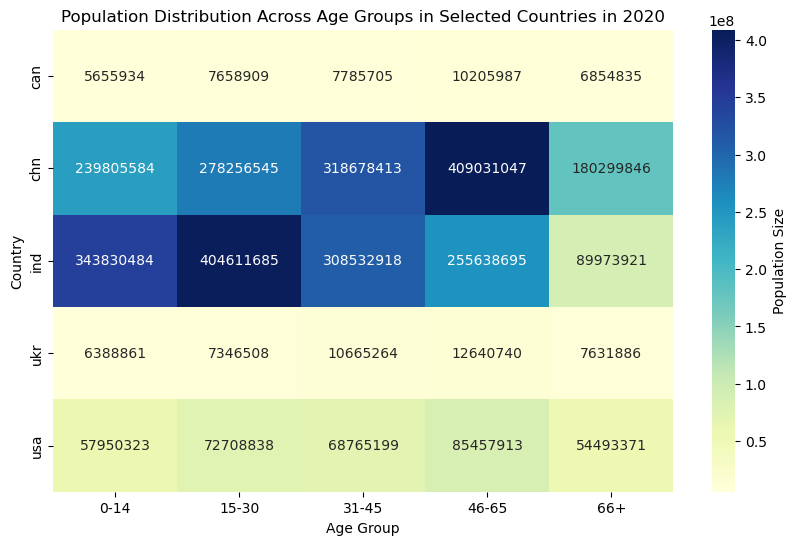

In [14]:
countries = ['usa', 'can', 'ind', 'chn', 'ukr']
year = 2020
df_pop = df[(df['year'] == year) & (df['country'].isin(countries))]

# age distributions
bins = [0, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
df_pop['age_group'] = pd.cut(df_pop['age'], bins=bins, labels=bin_labels, right=False)
heatmap = df_pop.groupby(['country', 'age_group'])['population'].sum().unstack()

# creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Population Size'})

# adding titles and labels
plt.title('Population Distribution Across Age Groups in Selected Countries in 2020')
plt.xlabel('Age Group')
plt.ylabel('Country')

plt.show()

Explanation: This heatmap clearly shows that the population distribution across age groups in China and India are much higher than the population in Canada, USA, and Ukraine in 2020. The country and age group with the most population in 2020 were 46-65 year olds in China. The country and age group with the least population in 2020 were 0-14 year olds in Ukraine.

2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

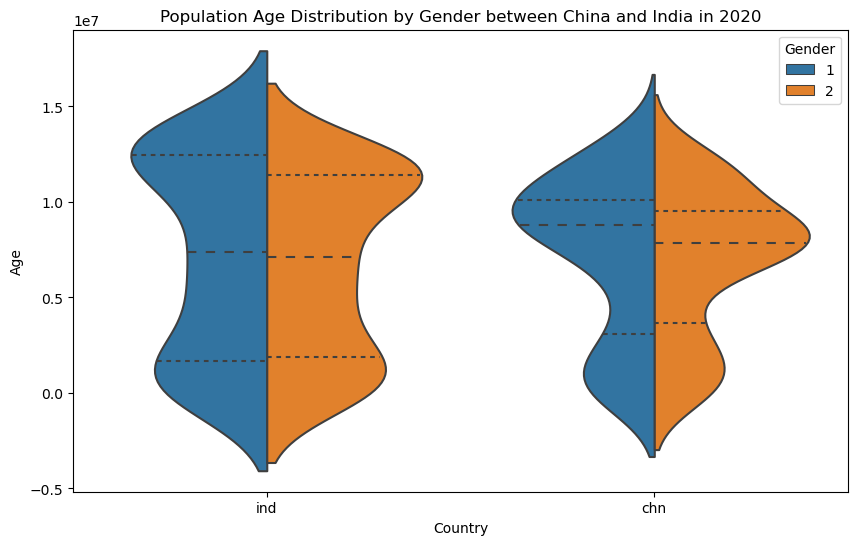

In [18]:
countries = ['chn', 'ind']
year = 2020

df_filter = df[(df['year'] == year) & (df['country'].isin(countries))]

# creating the violin plot
plt.figure(figsize=(10, 6))

sns.violinplot(x='country', y='population', hue='gender', data=df_filter, split=True, inner='quartile')
plt.title('Population Age Distribution by Gender between India and China in 2020')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title = 'Gender')

plt.show()

Explanation: The violin plots reveal that the population age distribution by gender between India and China in 2020 was fairly similar. The age maximum seems to be slightly larger for India compared to China.

3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot

/Users/shwethakandhalu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

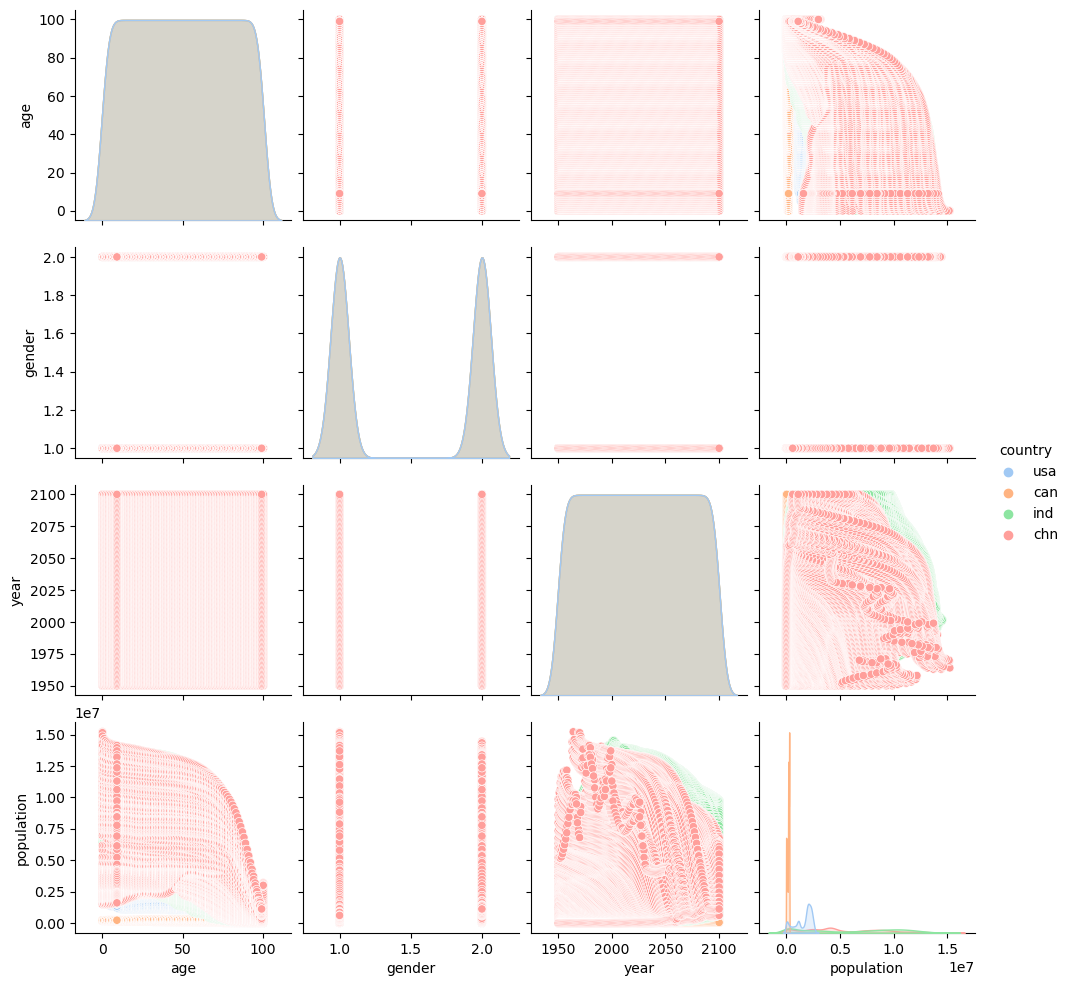

In [34]:
countries = ['usa', 'can', 'ind', 'chn']
df_filter = df[df['country'].isin(countries)]

plt.figure(figsize=(10, 6))

# creating the pairplot
sns.pairplot(df_filter, hue='country', palette = 'pastel')

plt.show()

Explanation: This pairplot shows the population, age, gender, and year metrics between USA, Canada, India, and China. The histograms in the diagonal shows that the age, gender, and year distributions across the 4 countries seem to be fairly the same. The ages range from 0-100, there are 2 genders (male and female), the population data spans across all the same years (1950-2100). However, the population size distribution is very clearly different. Canada has the lowest population distribution while India and China are fairly high with China taking the lead.